In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/data/heart.csv")
dataset["index"] = pd.Series(dataset.index.values)

In [ ]:
dataset.size

4545

In [ ]:
dataset.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,index
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,4


In [ ]:
#The number of features in the dataset are 14


In [ ]:
dataset.sample

<bound method NDFrame.sample of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  ou

In [ ]:
#The sample size of data is of 303rows and 14columns

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
index       0
dtype: int64

In [ ]:
#No null values were found in the dataset

In [ ]:
#We will choose output as out target variable

In [ ]:
dataset.min(axis=0)

age          29.0
sex           0.0
cp            0.0
trtbps       94.0
chol        126.0
fbs           0.0
restecg       0.0
thalachh     71.0
exng          0.0
oldpeak       0.0
slp           0.0
caa           0.0
thall         0.0
output        0.0
index         0.0
dtype: float64

In [ ]:
dataset.max(axis=0)

age          77.0
sex           1.0
cp            3.0
trtbps      200.0
chol        564.0
fbs           1.0
restecg       2.0
thalachh    202.0
exng          1.0
oldpeak       6.2
slp           2.0
caa           4.0
thall         3.0
output        1.0
index       302.0
dtype: float64

In [ ]:
fig = px.histogram(dataset, x="output",color="output")
fig.update_layout(bargap=0.7)
fig.show()
#There are 138 instances of class 0
#There are 165 instances of class 1

In [ ]:
# We can get size of dataset by assigning index value to it.
dataset.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
from matplotlib.pyplot import plot as plt

List of outliers of age:
(array([72]),)
(array([144, 238]),)
List of outliers of trtbps:
(array([223, 248]),)
(array([ 71, 124]),)
List of outliers of chol:
(array([85]),)
(array([111]),)
List of outliers of thalachh:
(array([272]),)
List of outliers of oldpeak:
(array([101, 204, 221, 250, 291]),)


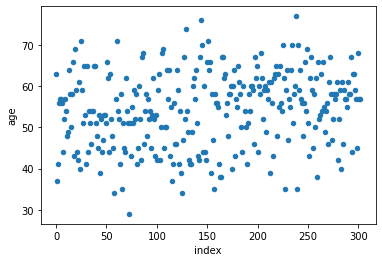

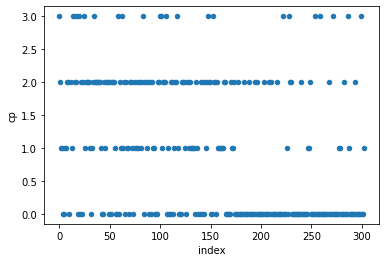

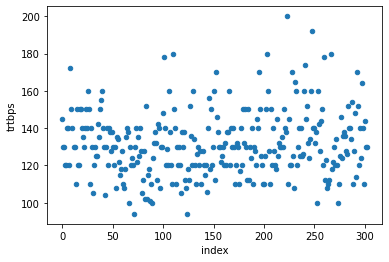

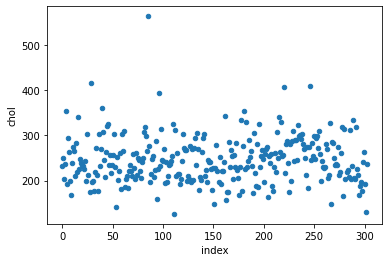

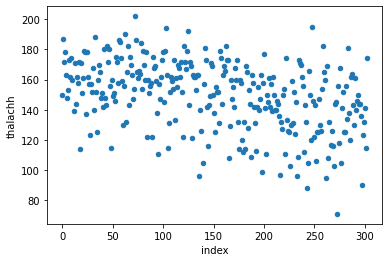

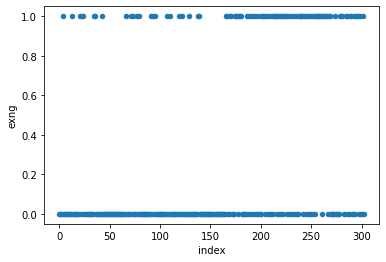

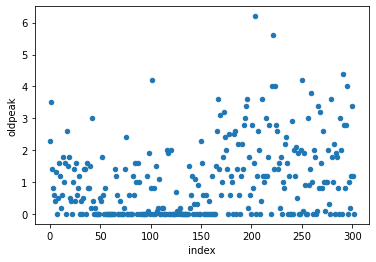

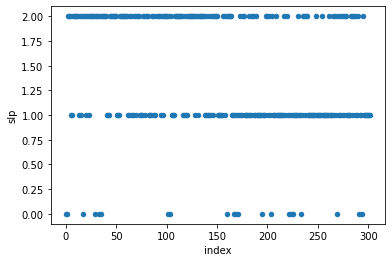

In [ ]:
dataset.plot.scatter(x='index', y="age")
print('List of outliers of age:')
print(np.where((dataset['age']<30)))
print(np.where((dataset['age']>75)))
dataset.plot.scatter(x='index', y="cp")
dataset.plot.scatter(x='index', y="trtbps")
print('List of outliers of trtbps:')
print(np.where((dataset['trtbps']>180)))
print(np.where((dataset['trtbps']<100)))
dataset.plot.scatter(x='index', y="chol")
print('List of outliers of chol:')
print(np.where((dataset['chol']>450)))
print(np.where((dataset['chol']<130)))
dataset.plot.scatter(x='index', y="thalachh")
print('List of outliers of thalachh:')
#print(np.where((dataset['thalachh']>450)))
print(np.where((dataset['thalachh']<80)))
dataset.plot.scatter(x='index', y="exng")
dataset.plot.scatter(x='index', y="oldpeak")
print('List of outliers of oldpeak:')
print(np.where((dataset['oldpeak']>4)))
dataset.plot.scatter(x='index', y="slp")

In [ ]:
fig = px.imshow(dataset.corr(), template="plotly_dark", title="Correlation Heatmap", labels=dict(x="Features", y="Features", color="Correlation"), color_continuous_scale="RdBu")
fig.show()

In [ ]:
from scipy.stats import kendalltau
corr_age,_ = kendalltau(dataset.age, dataset.output)
corr_sex,_ = kendalltau(dataset.sex, dataset.output)
corr_cp,_ = kendalltau(dataset.cp, dataset.output)
corr_trtbps,_ = kendalltau(dataset.trtbps, dataset.output)
corr_chol,_ = kendalltau(dataset.chol, dataset.output)
corr_fbs,_ = kendalltau(dataset.fbs, dataset.output)
corr_restecg,_ = kendalltau(dataset.restecg, dataset.output)
corr_thalachh,_ = kendalltau(dataset.thalachh, dataset.output)
corr_exng,_ = kendalltau(dataset.exng, dataset.output)
corr_oldpeak,_ = kendalltau(dataset.oldpeak, dataset.output)
corr_slp,_ = kendalltau(dataset.slp, dataset.output)
corr_caa,_ = kendalltau(dataset.caa, dataset.output)
corr_thall,_ = kendalltau(dataset.thall, dataset.output)
print('Kendall Rank correlation age: %.5f' % corr_age)
print('Kendall Rank correlation sex: %.5f' % corr_sex)
print('Kendall Rank correlation cp: %.5f' % corr_cp)
print('Kendall Rank correlation trtbps: %.5f' % corr_trtbps)
print('Kendall Rank correlation chol: %.5f' % corr_chol)
print('Kendall Rank correlation fbs: %.5f' % corr_fbs)
print('Kendall Rank correlation restecg: %.5f' % corr_restecg)
print('Kendall Rank correlation thalachh: %.5f' % corr_thalachh)
print('Kendall Rank correlation exng: %.5f' % corr_exng)
print('Kendall Rank correlation oldpeak: %.5f' % corr_oldpeak)
print('Kendall Rank correlation slp: %.5f' % corr_slp)
print('Kendall Rank correlation caa: %.5f' % corr_caa)
print('Kendall Rank correlation thall: %.5f' % corr_thall)

Kendall Rank correlation age: -0.19786
Kendall Rank correlation sex: -0.28094
Kendall Rank correlation cp: 0.43051
Kendall Rank correlation trtbps: -0.10206
Kendall Rank correlation chol: -0.09913
Kendall Rank correlation fbs: -0.02805
Kendall Rank correlation restecg: 0.14768
Kendall Rank correlation thalachh: 0.35261
Kendall Rank correlation exng: -0.43676
Kendall Rank correlation oldpeak: -0.36173
Kendall Rank correlation slp: 0.36141
Kendall Rank correlation caa: -0.43012
Kendall Rank correlation thall: -0.39260


In [ ]:
dataset.drop(['index'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
#list(dataset.columns)
columns = dataset.columns
features = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
x = dataset.loc[:, features]
y = dataset.loc[:, ['output']]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
encoded_df = pd.get_dummies(dataset, columns=categorical)
X = encoded_df.drop("output", axis=1)
y = encoded_df['output']

In [ ]:
# categorical = ['sex']
# encoded_df = pd.get_dummies(dataset, columns=categorical)
# print(encoded_df)
# dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training


In [ ]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train.values).long()
y_test = torch.tensor(y_test.values).long()

In [ ]:
X_train[0]

tensor([0.1163, 0.4694, 0.4388, 0.8952, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000,
        0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 1.0000, 0.0000])

In [ ]:
class HeartAttack(nn.Module):
    def __init__(self):
        super(HeartAttack, self).__init__()
        self.fc1 = nn.Linear(30, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 2)
        self.act = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.1)
    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.act(self.fc3(x))
        x = self.dropout(x)
        return self.fc4(x)

In [ ]:
net = HeartAttack()

In [ ]:
!pip install torchinfo
from torchinfo import summary

model = net
batch_size = 10
summary(model, input_size=(batch_size, 1, 30))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
HeartAttack                              [10, 1, 2]                --
├─Linear: 1-1                            [10, 1, 64]               1,984
├─LeakyReLU: 1-2                         [10, 1, 64]               --
├─Linear: 1-3                            [10, 1, 128]              8,320
├─LeakyReLU: 1-4                         [10, 1, 128]              --
├─Linear: 1-5                            [10, 1, 256]              33,024
├─LeakyReLU: 1-6                         [10, 1, 256]              --
├─Dropout: 1-7                           [10, 1, 256]              --
├─Linear: 1-8                            [10, 1, 2]                514
Total params: 43,842
Trainable params: 43,842
Non-trainable params: 0
Total mult-adds (M): 0.44
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.18
Estimated Total Size (MB): 0.21

In [ ]:
optimizer = optim.AdamW(net.parameters())
criterion = nn.CrossEntropyLoss()

In [ ]:
losses = []

In [ ]:
#y_train.values

In [ ]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
# y_train = torch.tensor(int(y_train.values)).long()
# y_test = torch.tensor(y_test.values).long()

<ipython-input-82-d8a1350b3b28>:1: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-82-d8a1350b3b28>:2: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [ ]:
max_test = 0
best_params = net.state_dict()
for epoch in range(1, 500):
    optimizer.zero_grad()
    outputs = net(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    _, preds_y = torch.max(outputs, 1)
    train_acc = accuracy_score(y_train, preds_y)
    
    pred_test = net(X_test)
    _, preds_test_y = torch.max(pred_test, 1)
    test_acc = accuracy_score(y_test, preds_test_y)
    print("Epoch {}, Loss: {}, Acc:{:.2f}%, Test Acc: {:.2f}%".format(epoch, loss.item(), 
                                                                      train_acc*100, test_acc * 100))
    if test_acc > max_test:
        max_test = test_acc
        best_params = net.state_dict()
net.load_state_dict(best_params)

Epoch 1, Loss: 0.6975423693656921, Acc:45.37%, Test Acc: 52.63%
Epoch 2, Loss: 0.6880775690078735, Acc:52.86%, Test Acc: 84.21%
Epoch 3, Loss: 0.6775174140930176, Acc:79.74%, Test Acc: 86.84%
Epoch 4, Loss: 0.6686205267906189, Acc:79.30%, Test Acc: 78.95%
Epoch 5, Loss: 0.6568938493728638, Acc:81.50%, Test Acc: 80.26%
Epoch 6, Loss: 0.6457859873771667, Acc:78.41%, Test Acc: 82.89%
Epoch 7, Loss: 0.6306899189949036, Acc:81.50%, Test Acc: 82.89%
Epoch 8, Loss: 0.6163474321365356, Acc:80.62%, Test Acc: 84.21%
Epoch 9, Loss: 0.5991433262825012, Acc:81.50%, Test Acc: 85.53%
Epoch 10, Loss: 0.579630434513092, Acc:83.26%, Test Acc: 86.84%
Epoch 11, Loss: 0.5583710670471191, Acc:82.38%, Test Acc: 86.84%
Epoch 12, Loss: 0.5369905829429626, Acc:83.26%, Test Acc: 88.16%
Epoch 13, Loss: 0.5128206014633179, Acc:82.38%, Test Acc: 89.47%
Epoch 14, Loss: 0.4884161353111267, Acc:84.58%, Test Acc: 88.16%
Epoch 15, Loss: 0.4615415930747986, Acc:84.14%, Test Acc: 89.47%
Epoch 16, Loss: 0.4389130175113678,

<All keys matched successfully>

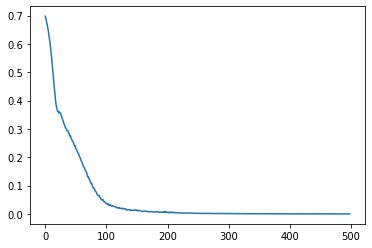

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(losses)

In [ ]:
pred_test = net(X_test)
_, preds_y = torch.max(pred_test, 1)

In [ ]:
accuracy_score(y_test, preds_y)


0.8947368421052632

In [ ]:
print(classification_report(y_test, preds_y))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        35
           1       0.92      0.88      0.90        41

    accuracy                           0.89        76
   macro avg       0.89      0.90      0.89        76
weighted avg       0.90      0.89      0.89        76



In [ ]:
con_mat = confusion_matrix(y_test, preds_y)
print(con_mat)

[[32  3]
 [ 5 36]]


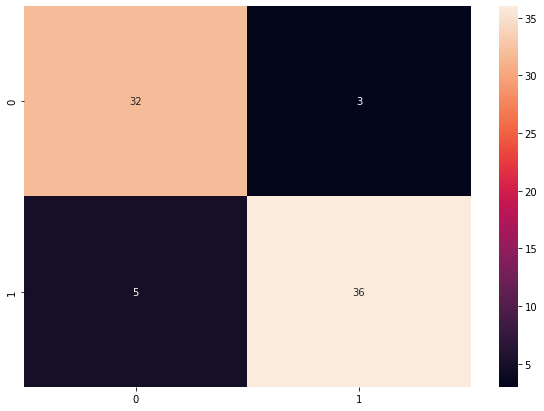

In [ ]:
import seaborn as sn
df_cm = pd.DataFrame(con_mat)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)